<a href="https://colab.research.google.com/github/satvik959/DL-2025-26/blob/main/WEEK3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Learning Rate: 1.0, Final Loss: 0.000135
Learning Rate: 1.25, Final Loss: 0.000106
Learning Rate: 1.5, Final Loss: 0.000087
Learning Rate: 1.75, Final Loss: 0.000074
Learning Rate: 2, Final Loss: 0.000064


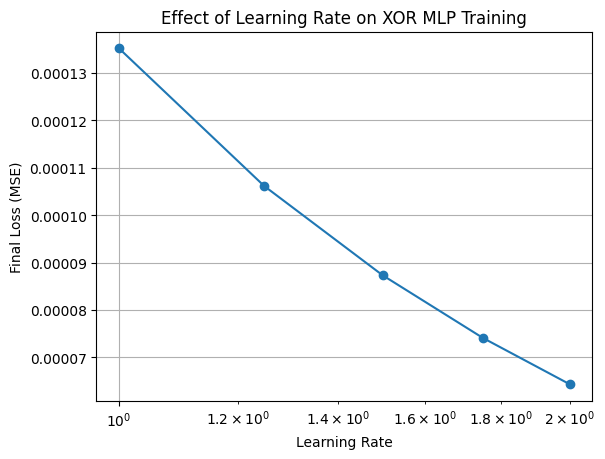

In [1]:
# MLP for XOR – Effect of Learning Rate on Loss
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)


X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([[0], [1], [1], [0]])


learning_rates = [ 1.0, 1.25, 1.5, 1.75, 2]
final_losses = []

epochs = 10000


for lr in learning_rates:

    np.random.seed(42)

    W1 = np.random.rand(2, 2)
    b1 = np.random.rand(1, 2)

    W2 = np.random.rand(2, 1)
    b2 = np.random.rand(1, 1)

    for epoch in range(epochs):

        hidden_input = np.dot(X, W1) + b1
        hidden_output = sigmoid(hidden_input)

        final_input = np.dot(hidden_output, W2) + b2
        y_pred = sigmoid(final_input)

        error = y - y_pred
        loss = np.mean(error ** 2)

        d_output = error * sigmoid_derivative(y_pred)
        d_hidden = d_output.dot(W2.T) * sigmoid_derivative(hidden_output)

        W2 += hidden_output.T.dot(d_output) * lr
        b2 += np.sum(d_output, axis=0, keepdims=True) * lr

        W1 += X.T.dot(d_hidden) * lr
        b1 += np.sum(d_hidden, axis=0, keepdims=True) * lr

    final_losses.append(loss)
    print(f"Learning Rate: {lr}, Final Loss: {loss:.6f}")

plt.figure()
plt.plot(learning_rates, final_losses, marker='o')
plt.xlabel("Learning Rate")
plt.ylabel("Final Loss (MSE)")
plt.title("Effect of Learning Rate on XOR MLP Training")
plt.xscale("log")
plt.grid(True)
plt.show()


In [2]:
from sklearn.linear_model import Perceptron
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)

perceptron = Perceptron()

perceptron.fit(X_train, y_train)

y_pred = perceptron.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8


In [3]:
from sklearn.linear_model import Perceptron
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X,y = load_breast_cancer(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

perceptron = Perceptron(max_iter=400, verbose=True, penalty='l1')
perceptron.fit(x_train,y_train)
y_pred = perceptron.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

-- Epoch 1
Norm: 5460.05, NNZs: 30, Bias: 53.000000, T: 398, Avg. loss: 215316.586429
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 8432.30, NNZs: 29, Bias: 93.000000, T: 796, Avg. loss: 152255.587266
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 10002.64, NNZs: 30, Bias: 115.000000, T: 1194, Avg. loss: 120801.766466
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 11543.27, NNZs: 29, Bias: 133.000000, T: 1592, Avg. loss: 90094.178472
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 13172.77, NNZs: 28, Bias: 156.000000, T: 1990, Avg. loss: 112926.792461
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 14254.99, NNZs: 28, Bias: 172.000000, T: 2388, Avg. loss: 81806.595351
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 15632.16, NNZs: 29, Bias: 188.000000, T: 2786, Avg. loss: 95144.955505
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 16582.02, NNZs: 28, Bias: 205.000000, T: 3184, Avg. loss: 88204.057719
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 1